# Image Processing
 
 -  [Color Mapping](#Color-Mapping)
 -  [Blending](#Blending)
 -  [Small Image Overlay On Big Image](#Small-Image-Overlay-On-Big-Image)
 -  [Masking](#Masking)
 -  [Image Tresholding](#Image-Tresholding)
 -  [Blurring & Smoothing](#Blurring-&-Smoothing)
 -  [Morphological Operators](#Morphological-Operators)
 -  [Gradients](#Gradients)
 -  [Histograms](#Histograms)

### Color Mapping

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
img = cv2.imread("DATA/00-puppy.jpg")

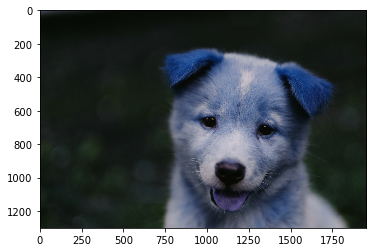

In [6]:
plt.imshow(img)

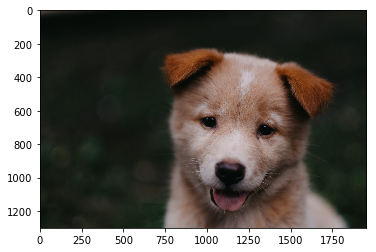

In [7]:
#Converting ColorSpace from opencv default(bgr) to rgb
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

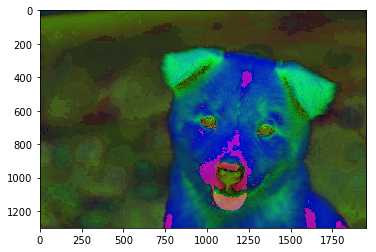

In [8]:
#Now converting Image from rgb to hsv
hsv_img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

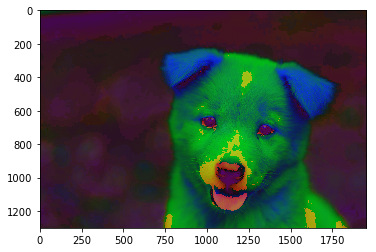

In [9]:
#Now converting Image from rgb to hls
hls_img = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
plt.imshow(hls_img)

### Blending

In [10]:
img1 = cv2.imread('DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

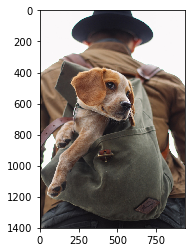

In [11]:
plt.imshow(img1)

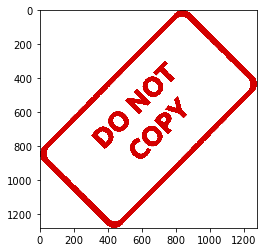

In [12]:
plt.imshow(img2)

In [13]:
# checking shape of both img1 & img2
img1.shape

(1401, 934, 3)

In [14]:
img2.shape

(1280, 1277, 3)

In [15]:
# Blending images of same size

In [16]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

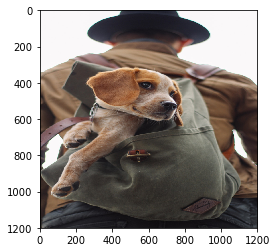

In [17]:
# After Resizing Image into same size 
plt.imshow(img1)

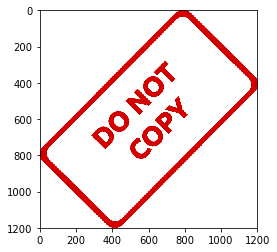

In [18]:
# After Resizing Image into same size 
plt.imshow(img2)

In [19]:
#alpha and beta value is actually fill/full
blended = cv2.addWeighted(src1=img1,alpha=0.8,src2=img2,beta=0.2,gamma=0)

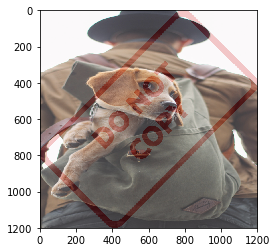

In [20]:
plt.imshow(blended)

### Small Image Overlay On Big Image

In [21]:
# Overlay small image on the top of big image (no blending)
# Numpy Assignment

In [22]:
img2 = cv2.resize(img2,(600,600))

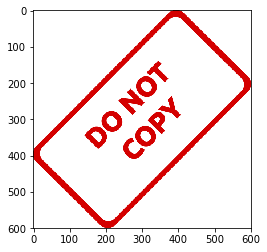

In [23]:
plt.imshow(img2)

In [24]:
large_img = img1
small_img = img2

In [25]:
#starting of x and y offset 
x_offset = 0
y_offset = 0 

In [26]:
x_end = x_offset + small_img.shape[1] #column
y_end = y_offset + small_img.shape[0] #row

In [27]:
small_img.shape

(600, 600, 3)

In [28]:
#slicing
large_img[y_offset:y_end,x_offset:x_end] = small_img

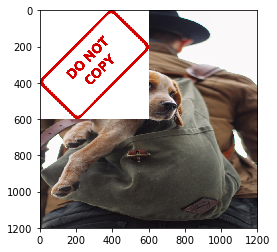

In [29]:
plt.imshow(large_img)

### Masking

In [30]:
#BLEND TOGETHER IMAGES OF DIFFERENT SIZES

In [31]:
img1 = cv2.imread('DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

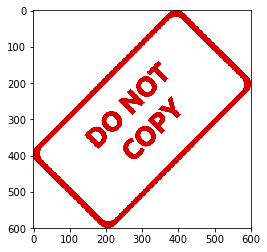

In [34]:
#Resizing watermark image to 600x600

img2 = cv2.resize(img2,(600,600))
plt.imshow(img2)

In [36]:
#checking img1 and its shape
img1.shape

(1401, 934, 3)

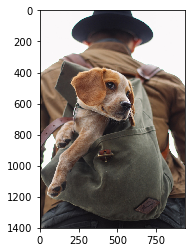

In [38]:
plt.imshow(img1)

In [42]:
# offset calculation 
# x_res- img_res
# y_res - img_res (here res = resolution)

x_offset = 934 - 600
y_offset = 1401 - 600

In [44]:
#tuple unpacking 
rows, cols,channels = img2.shape


In [46]:
#checking
rows

600

In [47]:
cols

600

In [48]:
channels

3

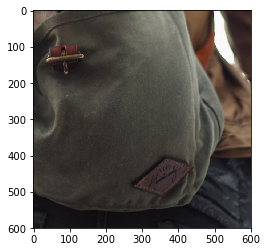

In [50]:
#taking roi from img 1 (bottom right corner)
roi = img1[y_offset:1401,x_offset:934]
plt.imshow(roi)

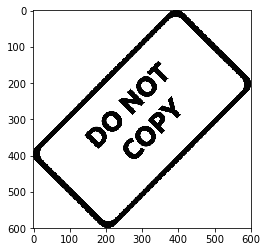

In [53]:
#now creating a grayscale version of image2 for masking
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
#color mapping (cmap='gray')
plt.imshow(img2gray,cmap='gray')

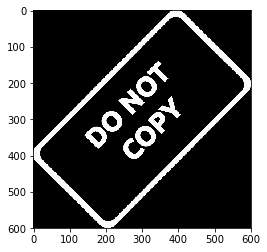

In [56]:
#reversing/inverse value using bitwise_not(img2gray)
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv,cmap='gray')

In [58]:
#mask_inv no longer containing 3 color channels
mask_inv.shape

(600, 600)

In [63]:
import numpy as np

In [66]:
#We need to do add those 3 color channels
# np.full(array will look like img2.shape,all value 255,DATATYPE)
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [67]:
white_background

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [68]:
white_background.shape

(600, 600, 3)

In [76]:
#bitwise_or(source,destination,mask=mask_img)
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

In [78]:
bk.shape

(600, 600, 3)

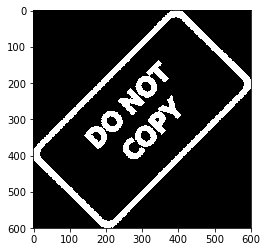

In [77]:
#now img2 masking -> bk has all 3 color channels
plt.imshow(bk)

In [81]:
#our original image was red, now bringing it back 
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)

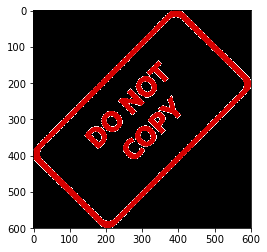

In [82]:
plt.imshow(fg)

In [83]:
final_roi = cv2.bitwise_or(roi,fg)

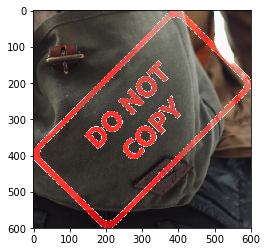

In [85]:
plt.imshow(final_roi)

In [88]:
#now setting final_roi to the actual image
large_img = img1
small_img = final_roi

In [89]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[0]] = small_img

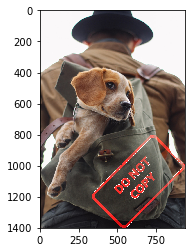

In [90]:
#FINAL MASKING IMAGE 
plt.imshow(large_img)

### Image Tresholding

### Blurring & Smoothing

### Morphological Operators

### Gradients

### Histograms